# Hossein Karimy

---



# 1.Importing the needed packages 

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, optimizers
import matplotlib.pyplot as plt
import itertools


# 2.Downloading the dataset

In [5]:
#DownloadandpreparetheCIFAR-10dataset
(trainImages,trainLabels),(testImages,testLabels) = datasets.cifar10.load_data()

# 3. Normalizing the data

In [6]:
#Normalize pixel values to be between 0 and 1 
trainImages,testImages=trainImages/255.0,testImages/255.0

# 3.1 Can show the images

In [ ]:
classNames = ['AirPlane', 'Automobile', 'Bird', 'Cat', 'Deer',
               'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(trainImages[i], cmap=plt.cm.binary)
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(classNames[trainLabels[i][0]])
plt.show()

# 4. Initialization 
*   We can have any number of optimizer in the "opts" array
*   "learningRates" contains given learning rates
*   "actFuncs" includes any number of activation function 





In [11]:
class CompiledModel:
  def __init__(self, model, actFunc, opt): 
        self.model = model
        self.actFunc = actFunc
        self.opt = type(opt).__name__
        self.learningRate = str(round(opt.learning_rate.numpy(), 3))
  def getTitle(self):
      return f'Model {self.actFunc}, {self.opt}, {self.learningRate}'
  

opts =[
       tf.keras.optimizers.Adam(), 
       #tf.keras.optimizers.Nadam(),
       #tf.keras.optimizers.SGD(),
       #tf.keras.optimizers.RMSprop(),
       ]

learningRates = [0.01, 0.1, 0.5, 0.9]
actFuncs = ['relu', 
         #   'softmax', 
          #  'sigmoid', 
           # 'linear'
            ]


# 5. Generating a grid including any combination of 
> acttivation_funcations x optimizer x learning rates



In [12]:

compiledModels = []
for actFunc in actFuncs:
  for opt in opts:
    for lr in learningRates:
      model = models.Sequential()
      model.add(layers.Conv2D(32, (3, 3), activation= actFunc, input_shape=(32, 32, 3)))
      model.add(layers.MaxPooling2D((2, 2)))
      model.add(layers.Conv2D(64, (3, 3), activation= actFunc))
      model.add(layers.MaxPooling2D((2, 2)))
      model.add(layers.Conv2D(64, (3, 3), activation= actFunc))
      model.add(layers.Flatten())
      model.add(layers.Dense(64, activation= actFunc))
      model.add(layers.Dense(10))
      opt.learning_rate = lr
      model.compile(optimizer=opt,
                    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                    metrics=['accuracy'])
      compModel = CompiledModel(model, actFunc, opt)
      
      compiledModels.append(compModel)

print(f'Compiled {len(compiledModels)} models')


Compiled 4 models


# 6. Training the models

In [16]:
for cmpModel in compiledModels:
  print(cmpModel.getTitle())
  cmpModel.history = cmpModel.model.fit(trainImages, trainLabels, epochs=10, 
                    validation_data=(testImages, testLabels))

Model relu, Adam, 0.01
1563/1563 [==============================] - 32s 20ms/step - loss: 2.4048 - accuracy: 0.1000 - val_loss: 2.4613 - val_accuracy: 0.1000
Model relu, Adam, 0.1
1563/1563 [==============================] - 29s 18ms/step - loss: 195105028.7854 - accuracy: 0.0987 - val_loss: 2.3483 - val_accuracy: 0.1000
Model relu, Adam, 0.5
1563/1563 [==============================] - 25s 15ms/step - loss: 657984174.9427 - accuracy: 0.0973 - val_loss: 2.4196 - val_accuracy: 0.1000
Model relu, Adam, 0.9
1563/1563 [==============================] - 27s 17ms/step - loss: 424705237.3749 - accuracy: 0.0983 - val_loss: 2.4594 - val_accuracy: 0.1000


# 7. Evaluating the models and showing a plot for each

313/313 - 2s - loss: 2.4594 - accuracy: 0.1000
313/313 - 1s - loss: 2.4594 - accuracy: 0.1000
313/313 - 1s - loss: 2.4594 - accuracy: 0.1000
313/313 - 1s - loss: 2.4594 - accuracy: 0.1000


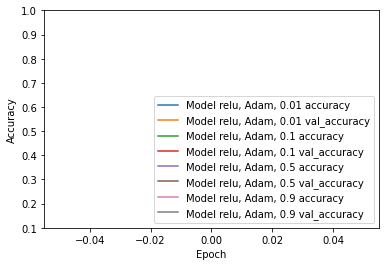

In [22]:
for compModel in compiledModels:
  plt.plot(compModel.history.history['accuracy'], label=f'{compModel.getTitle()} accuracy')
  plt.plot(compModel.history.history['val_accuracy'], label = f'{compModel.getTitle()} val_accuracy')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.ylim([0.1, 1])
  plt.legend(loc='lower right')
  plt.title = compModel.getTitle()

  test_loss, test_acc = model.evaluate(testImages,  testLabels, verbose=2)